# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [8]:
import pandas as pd
import numpy as np
# import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

Text(0, 0.5, 'Retrasos')

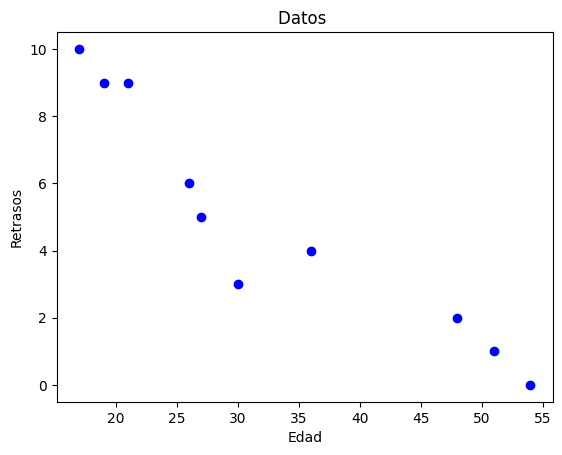

In [5]:
# Your code here
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='blue')
plt.title('Datos ')
plt.xlabel('Edad')
plt.ylabel('Retrasos')

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Si, a mayor edad, menos retrasos. Por tanto un regresion negativa

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [7]:
# your code here
covariance = np.cov(student_data['Edad'], student_data['Retrasos'])[0, 1]
print('Covariance:', covariance)

correlation = np.corrcoef(student_data['Edad'], student_data['Retrasos'])[0, 1]
print('Correlation:', correlation)


Covariance: -45.56666666666666
Correlation: -0.9391626886887122


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [20]:
# your explanation here
X = student_data[['Edad']]
y = student_data['Retrasos']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y__pred = lin_reg.predict(X)

Grafica tu modelo de regresión en tu diagrama de dispersión.

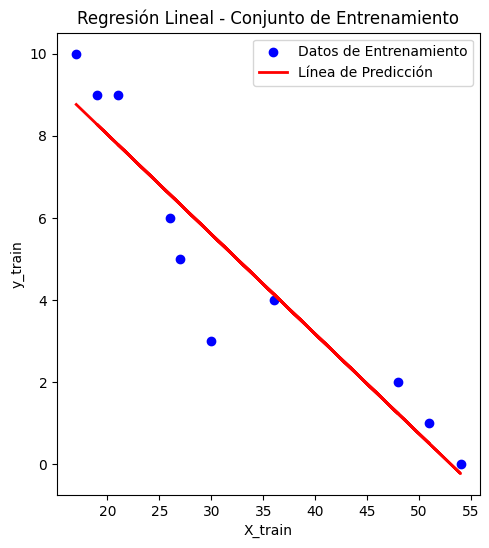

In [21]:
# Your code here.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Datos de Entrenamiento')
plt.plot(X, y__pred, color='red', linewidth=2, label='Línea de Predicción')
plt.title('Regresión Lineal - Conjunto de Entrenamiento')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

Si, se ve un correlación clara entre las dos variables.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [30]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("C:\\Users\\Ale\\Documents\\IronHack\\Git\\salidas\\vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [35]:
# Your code here.

# correlation = np.corrcoef(vehicles['Fuel Barrels/Year'], vehicles['CO2 Emission Grams/Mile'])[0, 1]
# print('Correlation:', correlation)
column_num = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']


matrix = vehicles[column_num].corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 E

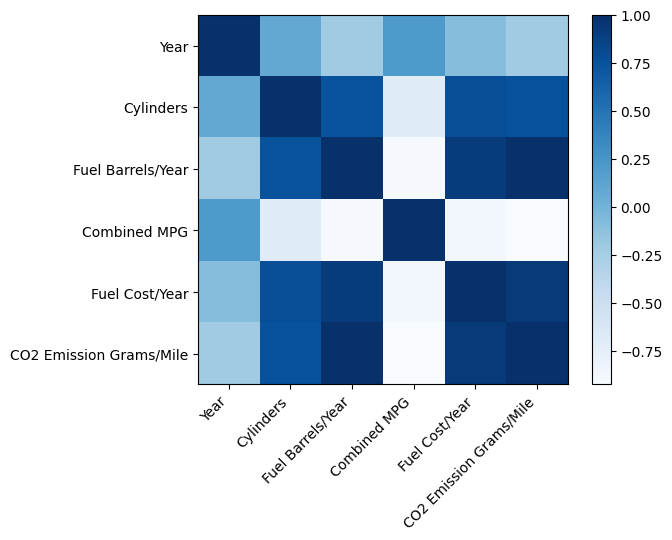

In [36]:
# plotting correlation matrix
plt.imshow(matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [51]:
# Your code here.
from sklearn.model_selection import train_test_split

# X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
X = vehicles[['Fuel Barrels/Year']]
y = vehicles['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print(f'MSE (Train): {mse_train}')
print(f'RMSE (Train): {rmse_train}')
print(f'R^2 (Train): {r2_train}')

y_test_pred = lin_reg.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE (Test): {mse_test}')
print(f'RMSE (Test): {rmse_test}')
print(f'R^2 (Test): {r2_test}')

MSE (Train): 377.7453629362412
RMSE (Train): 19.43567243334383
R^2 (Train): 0.9733835576859815
MSE (Test): 433.3196383429245
RMSE (Test): 20.81633104903274
R^2 (Test): 0.9692821975562166


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

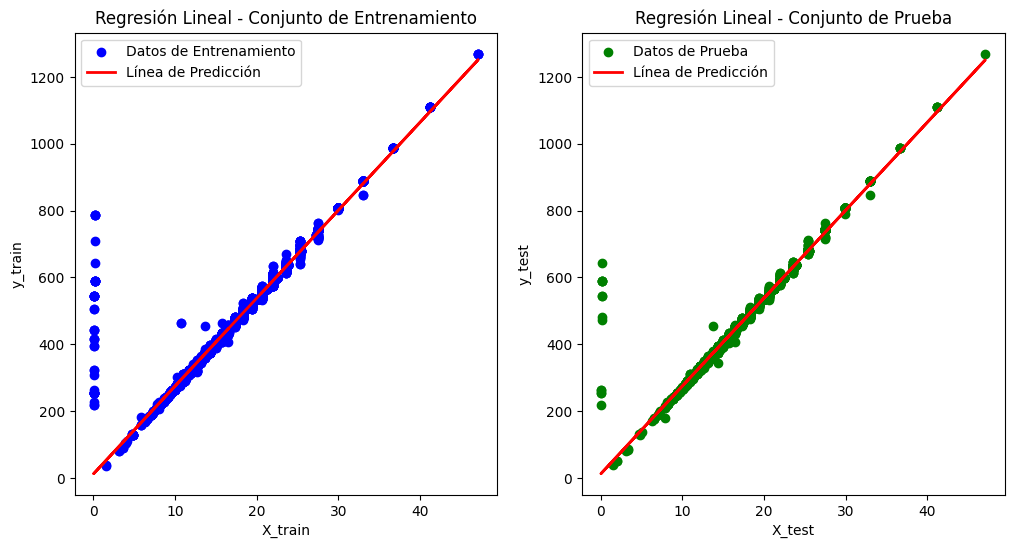

In [52]:
# Your code here.

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train['Fuel Barrels/Year'], y_train, color='blue', label='Datos de Entrenamiento')
plt.plot(X_train['Fuel Barrels/Year'], y_train_pred, color='red', linewidth=2, label='Línea de Predicción')
plt.title('Regresión Lineal - Conjunto de Entrenamiento')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()

# Graficar los datos de prueba y la línea de regresión
plt.subplot(1, 2, 2)
plt.scatter(X_test['Fuel Barrels/Year'], y_test, color='green', label='Datos de Prueba')
plt.plot(X_test['Fuel Barrels/Year'], y_test_pred, color='red', linewidth=2, label='Línea de Predicción')
plt.title('Regresión Lineal - Conjunto de Prueba')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()

plt.show()

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*